In [1]:
using CairoMakie

In [2]:
set_theme!(theme_dark())

In [1]:
include("egm_code.jl")

find_equilibrium (generic function with 1 method)

In [2]:
model = create_EGM_model_aiyagari(;na = 101, nz = 19)

(n = 1919, na = 101, nz = 19, α = 0.33, β = 0.96, A = 0.8, γ = 2.0, δ = 0.1, θ = 2, lb = 0, ub = 1000.0, ρ = 0.9, μ = 0.0, σ = 0.003, agrid = [0.0, 0.1, 0.4, 0.9, 1.6, 2.5000000000000004, 3.6, 4.9, 6.4, 8.1  …  828.1, 846.4000000000001, 864.9000000000001, 883.5999999999999, 902.5, 921.6, 940.9, 960.3999999999999, 980.1, 1000.0], zgrid = -3.815376618407356:0.42426406871192845:3.8213766184073563, Π = [3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; … ; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6; 3.814697265625e-6 6.866455078125e-5 … 6.866455078125e-5 3.814697265625e-6], w = 1.0, R_lb = 0.9, R_ub = 1.0416666666666667, R_iter = 1.0, toler_pol = 1.0e-6, toler_prices = 0.001, maxiter_pol = 500, maxiter_prices = 100, print_skip_pol = 500, print_skip_prices = 1)

In [3]:
a_init = initial_guess(model)
assets_today = zeros(model.na, model.nz)
policy = copy(assets_today)
c = copy(assets_today)
rearrange_budget = copy(assets_today)

s, c = egm_find_policies(a_init, assets_today, policy, c, rearrange_budget, model)

/// Finding Policy Functions... ///
--------------------
Iteration: 0, Error: 0.3226486841432348
--------------------
Iteration: 500, Error: 0.15765129354896004
--------------------
/// Found Policy Functions ///


([0.0 0.0 … 18.035787793883166 27.730326921285812; 0.0 0.0 … 18.09716741094205 27.791741188390453; … ; 601.9758425429034 601.982996935054 … 620.3234874916186 630.026733866078; 614.2052803317828 614.2124347247637 … 632.5529266794815 642.2561735499886], [0.022029416207459813 0.03367119517536108 … 11.841917194451177 17.93670422379726; 0.12202941620745981 0.13367119517536108 … 11.880537577392296 17.97528995669262; … ; 378.14618687330415 378.1506742601214 … 389.6542174967158 395.7402972790052; 385.8167490844247 385.8212364704116 … 397.32477830885273 403.4108575950944])

In [4]:
dist, wealth, pol = find_equilibrium(model)

Starting price iteration
//////////////////////
Price iteration: 0
R_iter = 0.9708333333333334
Kd = 0.3993727732067193
w_iter = 2.6925865089609946
/// Finding Policy Functions... ///
--------------------
Iteration: 0, Error: 2.419997864878164
--------------------
Iteration: 500, Error: 0.49784485245949567
--------------------
/// Found Policy Functions ///
%%%%%%%%%%%%%%%
Price iteration: 0, r = 0.9708333333333334, w = 2.6925865089609946, Ks = 4.3048248105031135, Kd = 0.3993727732067193, diff = 3.9054520372963943
%%%%%%%%%%%%%%%
//////////////////////
Price iteration: 1
R_iter = 0.9354166666666668
Kd = 0.7987455464134362
w_iter = 3.3846172538210055
/// Finding Policy Functions... ///
--------------------
Iteration: 0, Error: 1.0993531415769555
--------------------
Iteration: 500, Error: 1.1176804824796507
--------------------
/// Found Policy Functions ///
%%%%%%%%%%%%%%%
Price iteration: 1, r = 0.9354166666666668, w = 3.3846172538210055, Ks = 45.15488747084535, Kd = 0.7987455464134362

UndefVarError: UndefVarError: `w_final` not defined

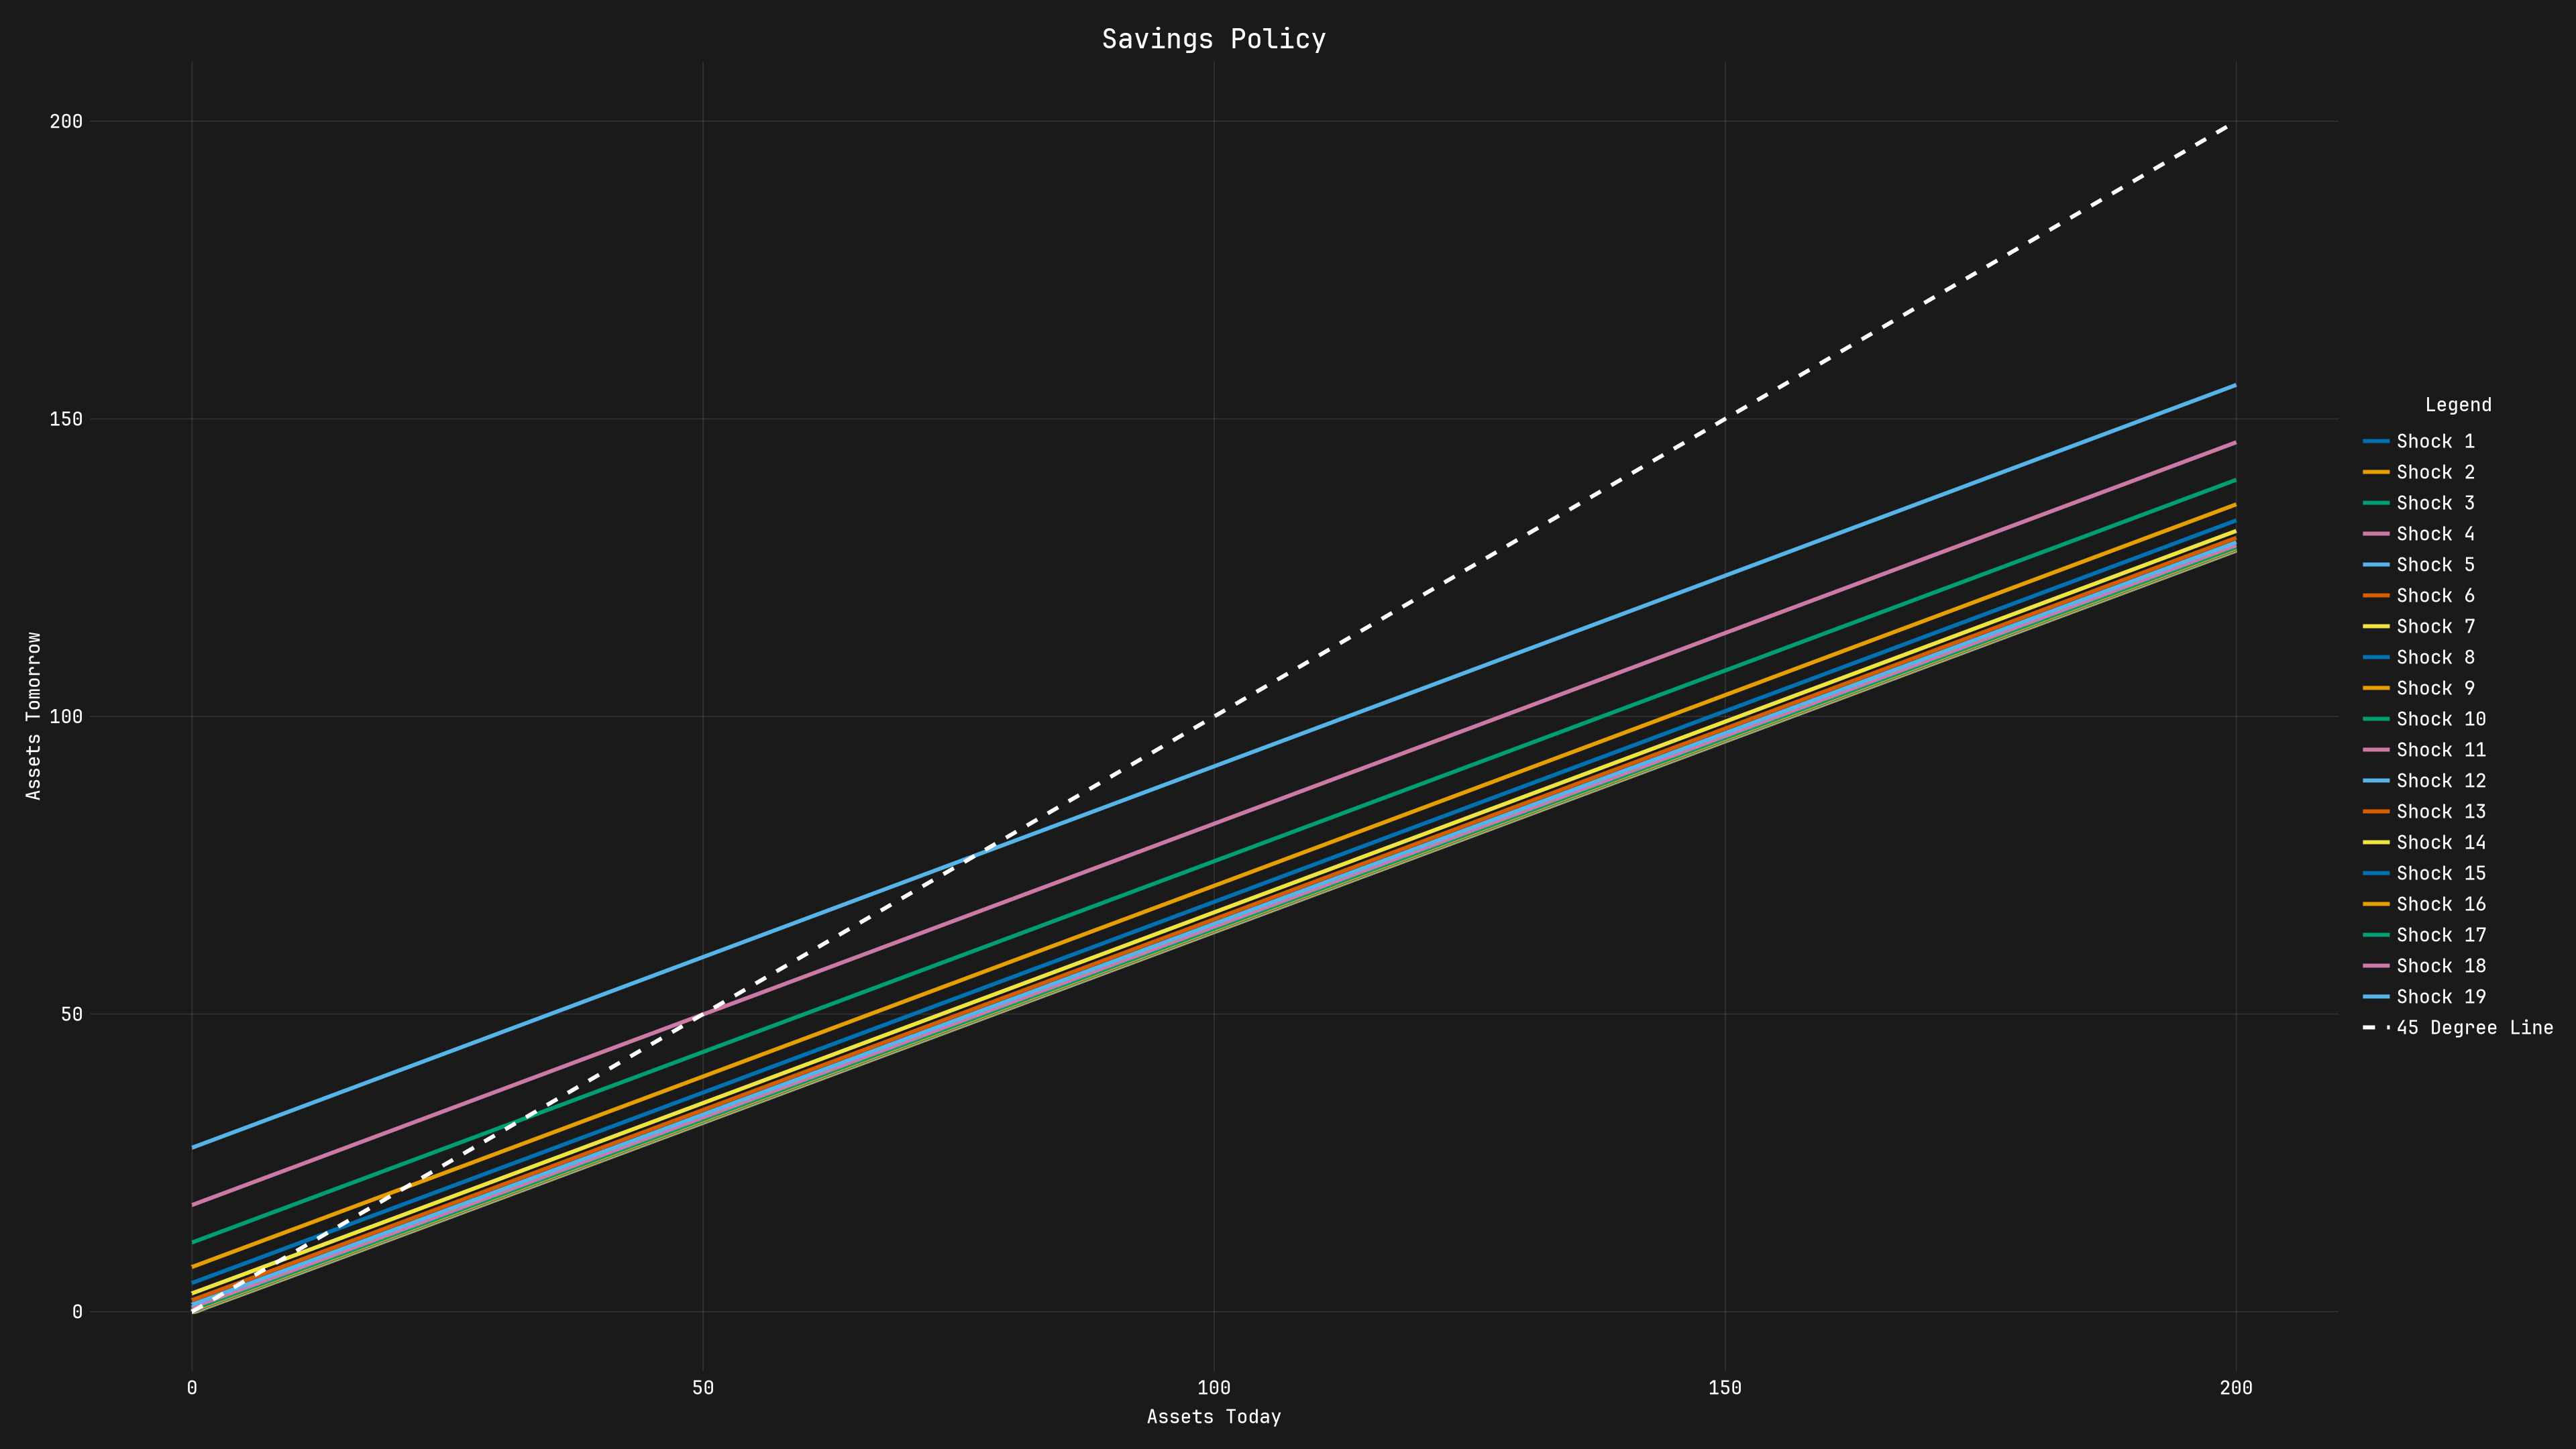

In [35]:
fig = Figure(size = (1920, 1080))

ax = Axis(fig[1, 1], 
        title = "Savings Policy",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        titlesize = 20,
        xlabel = "Assets Today",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabel = "Assets Tomorrow", 
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")

for z in 1:model.nz
    lines!(ax, model.agrid, s[:, z], linewidth = 3, label = "Shock $z")
end

lines!(ax, model.agrid, model.agrid, color = :white, linestyle = :dash, linewidth = 3, label = "45 Degree Line")

legend = Legend(fig[1, 2], 
                ax, 
                "Legend",  
                orientation = :vertical, 
                fontsize = 4, 
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)

fig

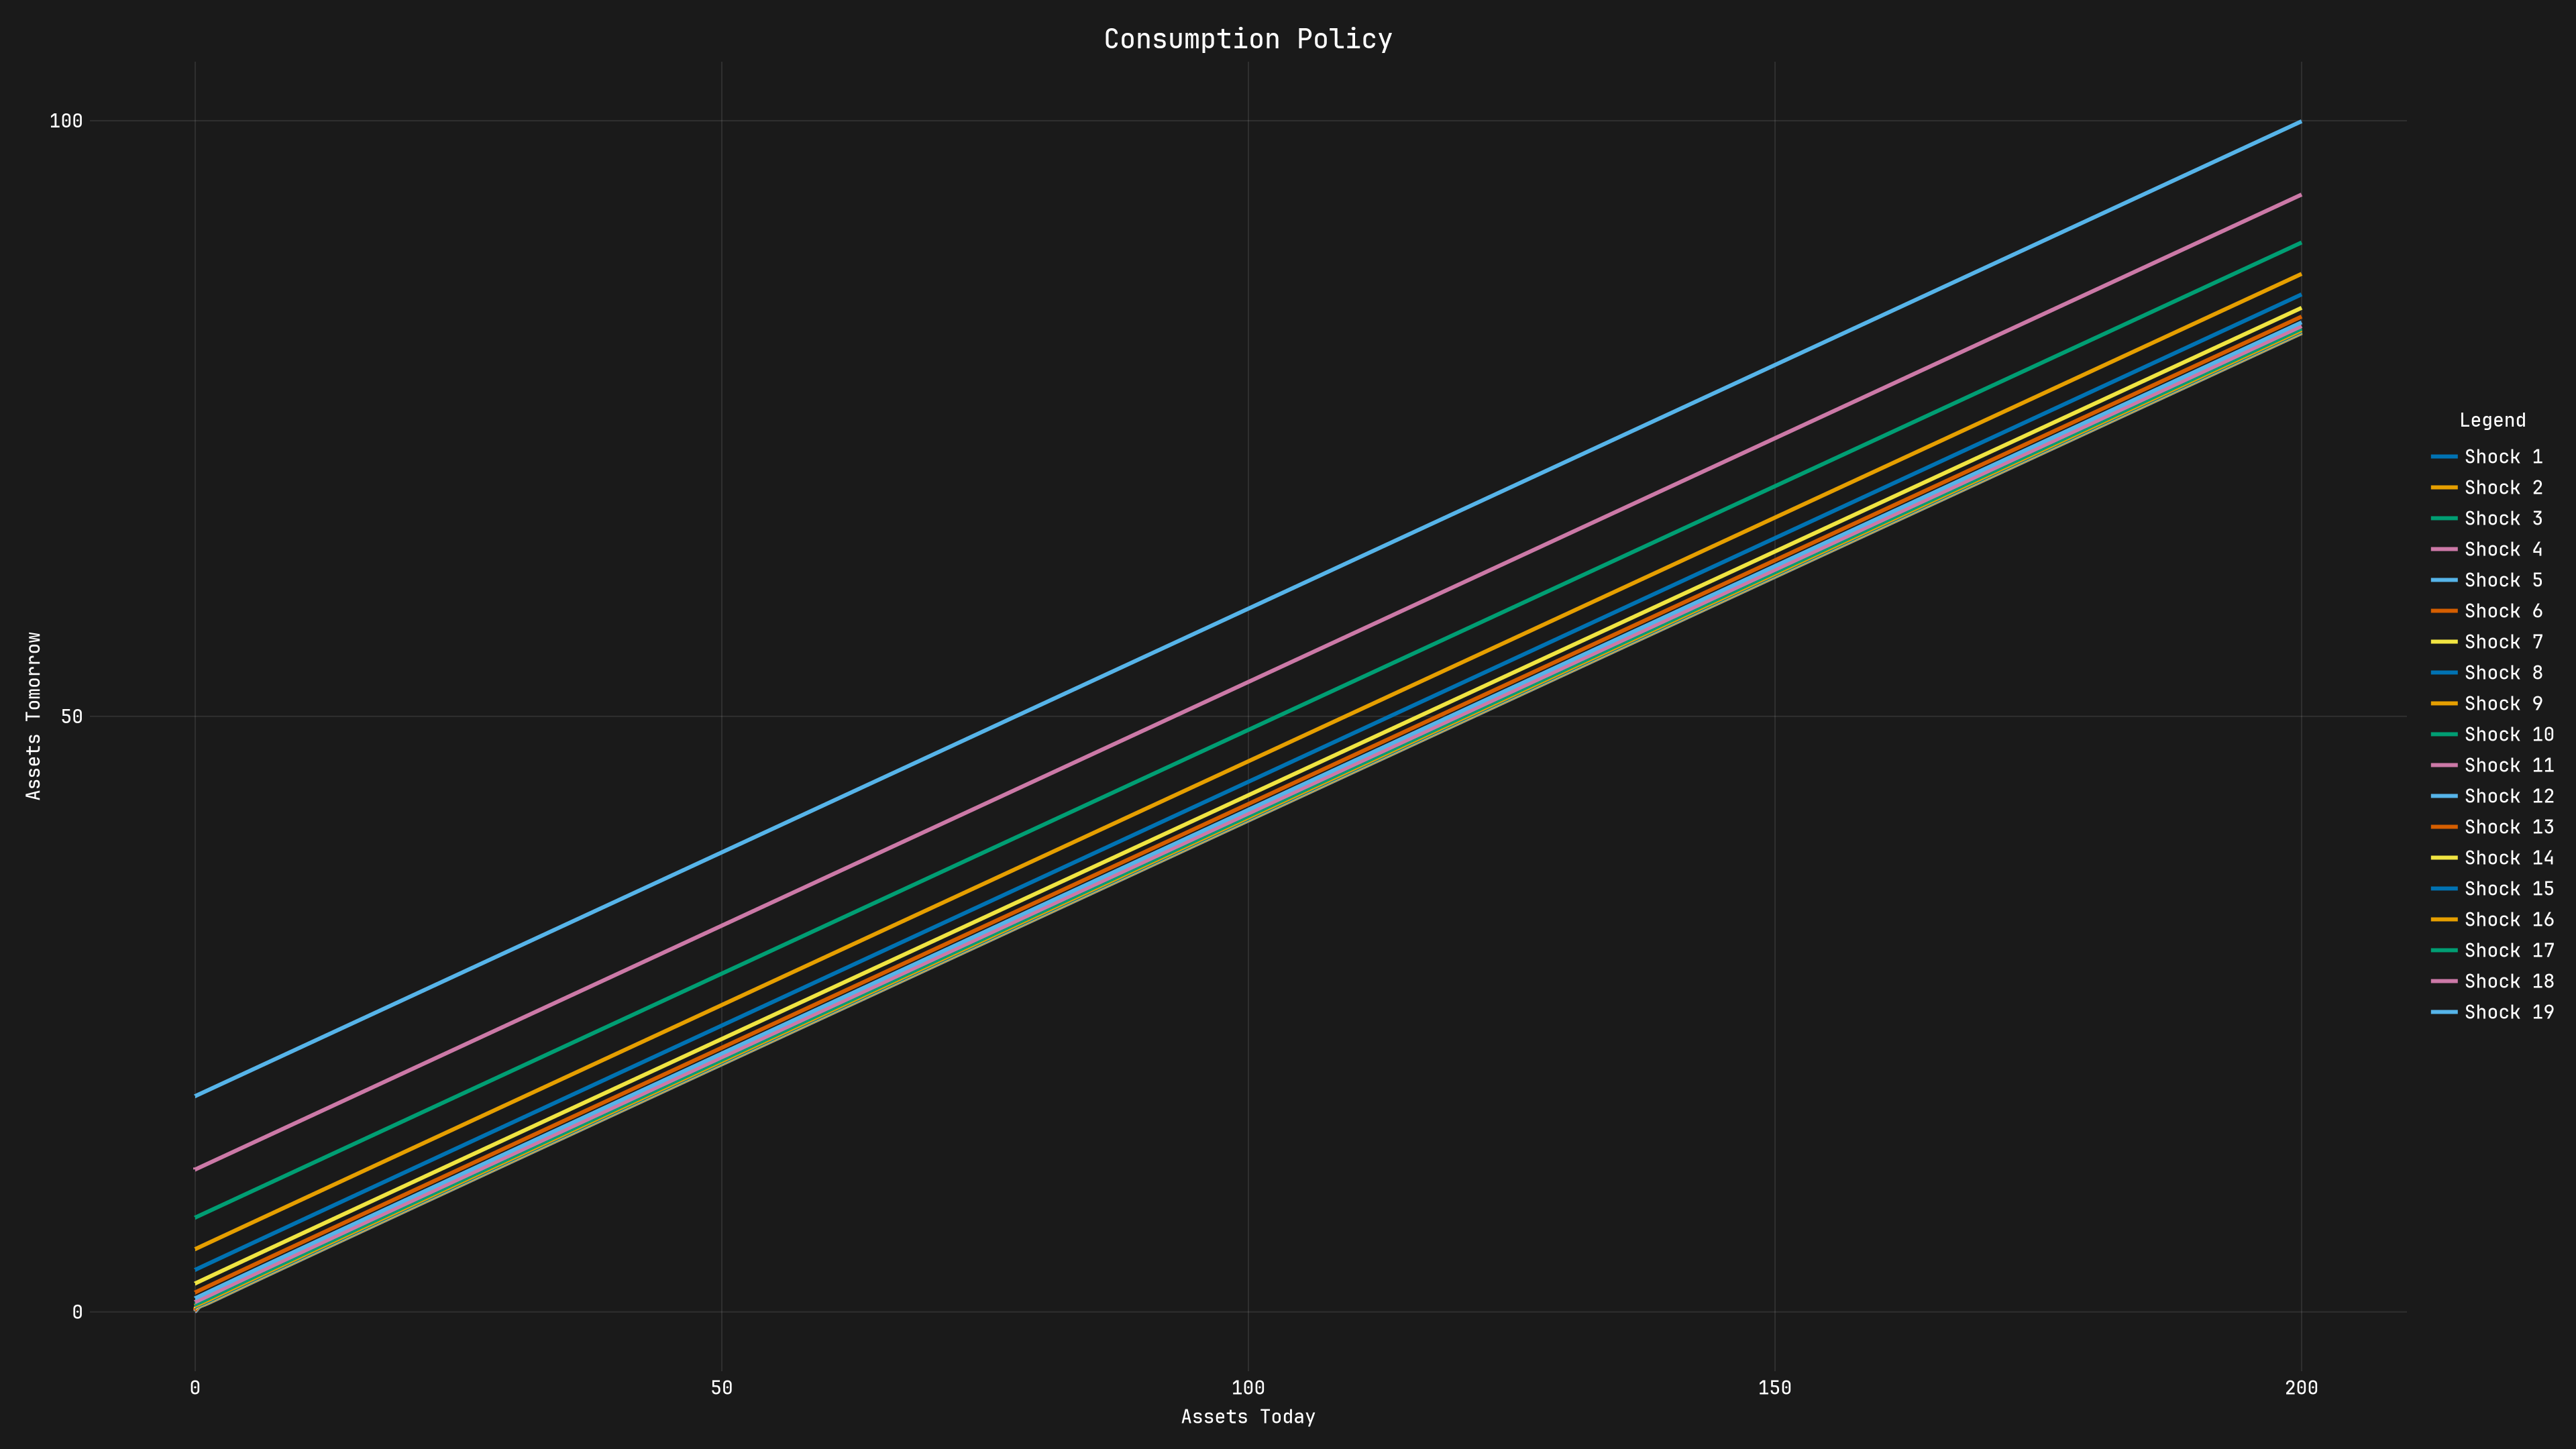

In [36]:
fig = Figure(size = (1920, 1080))

ax = Axis(fig[1, 1], 
        title = "Consumption Policy",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        titlesize = 20,
        xlabel = "Assets Today",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabel = "Assets Tomorrow", 
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")

for z in 1:model.nz
    lines!(ax, model.agrid, c[:, z], linewidth = 3, label = "Shock $z")
end

legend = Legend(fig[1, 2], 
                ax, 
                "Legend",  
                orientation = :vertical, 
                fontsize = 4, 
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)

fig